In [1]:
import pandas as pd
import numpy as np

#### Download the data from the above link. How many ".csv" files are available in the dataset?

* 4 

In [2]:
movie = pd.read_csv(r"C:\Users\Akanksha\Downloads\movie_data\movies.csv")

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### What is the shape of "movies.csv"?

In [4]:
movie.shape

(9742, 3)

In [5]:
rating = pd.read_csv(r"C:\Users\Akanksha\Downloads\movie_data\ratings.csv")

#### What is the shape of "ratings.csv"?

In [6]:
rating.shape

(100836, 4)

In [7]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### How many unique "userId" are available in "ratings.csv"?

In [8]:
rating['userId'].nunique()

610

#### Which movie has recieved maximum number of user ratings?

In [20]:
temp_df1 = pd.merge(movie,rating, how ="inner")

In [21]:
temp_df

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [11]:
grp = temp_df.groupby('title')

In [12]:
grp['rating'].count().idxmax()

'Forrest Gump (1994)'

In [13]:
tags = pd.read_csv(r"C:\Users\Akanksha\Downloads\movie_data\tags.csv")

In [14]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [15]:
tags.shape

(3683, 4)

#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [16]:
temp_df = pd.merge(movie,tags, how ="inner")

In [17]:
temp_df.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [18]:
temp_df.loc[temp_df["title"]== "Matrix, The (1999)","tag"]

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [23]:
res = temp_df1.loc[temp_df1["title"]== "Terminator 2: Judgment Day (1991)","rating"]

In [24]:
res.mean()

3.970982142857143

#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
plot = temp_df1.loc[temp_df1['title']=="Fight Club (1999)","rating"]

<Axes: ylabel='Frequency'>

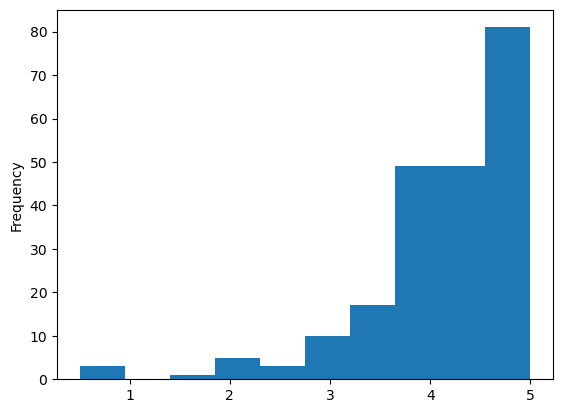

In [27]:
plot.plot.hist()

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

#### Which movie is the most popular based on  average user ratings?


In [28]:
temp_df1 = pd.merge(movie,rating, how ="inner")

In [29]:
import pandas as pd

grouped_ratings = temp_df1.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merged_df = pd.merge(temp_df1, grouped_ratings, on='movieId', how='inner')


filtered_movies = merged_df[merged_df['count'] > 50]
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]

print(most_popular_movie)


movieId                                   318
title        Shawshank Redemption, The (1994)
genres                            Crime|Drama
userId                                      2
rating                                    3.0
timestamp                          1445714835
count                                     317
mean                                 4.429022
Name: 8652, dtype: object


#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [30]:
import pandas as pd

grouped_ratings = temp_df1.groupby('title')['rating'].count().reset_index()

sorted_movies = grouped_ratings.sort_values(by='rating', ascending=False)

top_5_movies = sorted_movies.head(5)
print(top_5_movies)

                                 title  rating
3158               Forrest Gump (1994)     329
7593  Shawshank Redemption, The (1994)     317
6865               Pulp Fiction (1994)     307
7680  Silence of the Lambs, The (1991)     279
5512                Matrix, The (1999)     278


In [31]:
filtered_movies[filtered_movies['genres'].str.contains("Sci-Fi")]

,movieId,title,genres,userId,rating,timestamp,count,mean
1502,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,4,2.0,945173447,177,3.983051
1503,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,6,4.0,845553426,177,3.983051
1504,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,8,3.0,839463624,177,3.983051
1505,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,14,4.0,835441168,177,3.983051
1506,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,18,4.0,1455209840,177,3.983051
...,...,...,...,...,...,...,...,...
98310,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,1491095067,54,3.833333
98311,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,1529899267,54,3.833333
98312,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,1535709074,54,3.833333
98313,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,1519457935,54,3.833333


In [32]:
df2 = pd.read_csv(r"C:\Users\Akanksha\Downloads\movie_data\tags.csv")

In [33]:
df2.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [34]:
temp_df2 = pd.merge(movie, df2,how = 'inner')

In [35]:
temp_df2.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [36]:
temp_df2.loc[(temp_df2['title']== "Matrix, The (1999)"),"tag"]

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

In [37]:
temp_df = pd.merge(movie,rating, how ="inner")

In [38]:
temp_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [39]:
temp_df2.loc[(temp_df2["title"]== "Matrix, The (1999)"),"tag"]

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

In [40]:
temp_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [41]:
filtered_df = temp_df.groupby("title").filter(lambda x: x['rating'].count()>50)

In [42]:
filtered_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [43]:
filtered_df.shape

(40712, 6)

In [44]:
grouped_df = filtered_df.groupby("title")['rating'].agg(['count','mean'])

In [45]:
grouped_df

,count,mean
title,,
10 Things I Hate About You (1999),54,3.527778
12 Angry Men (1957),57,4.149123
2001: A Space Odyssey (1968),109,3.894495
28 Days Later (2002),58,3.974138
300 (2007),80,3.681250
...,...,...
X-Men: The Last Stand (2006),52,3.355769
X2: X-Men United (2003),76,3.723684
Young Frankenstein (1974),69,3.992754


In [46]:
grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merged_df = pd.merge(movie, grouped_ratings, on='movieId', how='inner')


filtered_df = merged_df[merged_df['count'] > 50]

# Find the most popular movie based on mean rating
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]

# Display the final result
print(most_popular_movie)

movieId                                   318
title        Shawshank Redemption, The (1994)
genres                            Crime|Drama
userId                                      2
rating                                    3.0
timestamp                          1445714835
count                                     317
mean                                 4.429022
Name: 8652, dtype: object


In [47]:
filtered_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [48]:
top_movies = filtered_df.sort_values(by='count', ascending = False)

In [49]:
top_movies.head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [50]:
top_movies[top_movies["genres"].str.contains("Sci-Fi")]

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [51]:
links_df = pd.read_csv(r"C:\Users\Akanksha\Downloads\movie_data\links.csv")

In [52]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [53]:
filtered_df = temp_df.groupby("title").filter(lambda x: x['rating'].count()>50)

merged_df = pd.merge(filtered_df,links_df, on='movieId', how='inner')


In [54]:
merged_df

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,114709,862.0
...,...,...,...,...,...,...,...,...
40707,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,561,2.0,1491095067,1431045,293660.0
40708,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,586,4.0,1529899267,1431045,293660.0
40709,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,596,4.0,1535709074,1431045,293660.0
40710,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,599,3.5,1519457935,1431045,293660.0


In [55]:
merged_df['title'].nunique()

437

In [56]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from tqdm import tqdm 
links_df = pd.read_csv(r"C:\Users\Akanksha\Downloads\movie_data\links.csv")

filtered_df = temp_df.groupby("title").filter(lambda x:x['rating'].count()>50)

merged_df = pd.merge(filtered_df,links_df, on='movieId', how='inner')


In [57]:
def scrape_imdb_rating(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0'
    }
    response = requests.get(url, headers=headers)
   
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_element = soup.find('span', itemprop='ratingValue')
        return float(rating_element.text) if rating_element else None
    else:
        return None


In [ ]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

ratings = []
for i in list(final_df['imdbId']):
    ratings.append(scrapper(i))